Neural Network Using Keras

Regression Neural Network

Created a neural network model using Keras to predict home prices based on the California Housing dataset.

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import data:
housing = fetch_california_housing()

# Data partitioning : using (train_test_split) => training set | test set
# housing data & housing target (split to) : (full training sets : X_train_full | y_train_full ,, test sets : X_test | y_test)
# (full training sets : X_train_full | y_train_full ) (split to) : (X_train | y_train) & (validation set : X_valid | y_valid)
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# StandardScaler is used to standardize data (convert it to a distribution with a mean of 0 and a standard deviation of 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# print(y_train[:3]): Displays the first 3 values ​​of the targets in the training set.
print(y_train[:3])
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
# Prints the minimum and highest value of the targets in the test set.
print(min(y_test), max(y_test))

[1.442 1.687 1.621]
0.14999 5.00001


Result :

first three houses values => 1.442 1.687 1.621

min value => 0.14999

max value => 5.00001

In [5]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
# First layer : 30 (neurons) | activation function : ReLU | Define the format of the input using (input_shape) Which means that the model expects data of the same shape as the X_train
# Second Layer : The output layer has only one neuron because we want to predict only one value (house price)
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # 'sgd' | learning rate = 0.001
# Model training
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
# After training, the model is evaluated using the test set (X_test and y_test)
# MSE (mean square error rate) is calculated on the test data
mse_test = model.evaluate(X_test, y_test)
# The first 3 samples are taken from the test set (X_test[:3]) and the model is used to make predictions (model.predict(X_new)).
X_new = X_test[:3]
y_pred = model.predict(X_new)
"""
Expected result:
The model will be trained and evaluated on the test set.
get the Mean Square Error (MSE) in mse_test which shows the quality of the model on the test set.
The predictions produced by the model will be stored in y_pred.
"""

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5872 - val_loss: 0.9142
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8458 - val_loss: 0.7013
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7197 - val_loss: 0.6515
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6765 - val_loss: 0.6135
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6430 - val_loss: 0.5822
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6142 - val_loss: 0.5553
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5892 - val_loss: 0.5313
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5675 - val_loss: 0.5106
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5492 - val_loss: 0.4928
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5334 - val_loss: 0.4773
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5198 - val_loss: 0.4638
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

'\nExpected result:\nThe model will be trained and evaluated on the test set.\nget the Mean Square Error (MSE) in mse_test which shows the quality of the model on the test set.\nThe predictions produced by the model will be stored in y_pred.\n'

Notes

The accuracy does not appear in the code result because metrics are not used

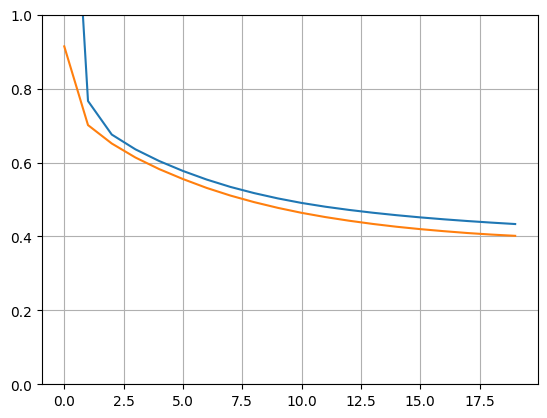

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The graph represents :

x-axis : epochs | y-axis : the values ​​associated with:loss

training loss & validation loss

In [8]:
y_pred

array([[0.46314737],
       [1.6061108 ],
       [3.3880475 ]], dtype=float32)